# 🧪 Benchmarking Metaheuristics for the Traveling Salesman Problem (TSP)

## 📘 About this Notebook

In this notebook, we present an **Exploratory Data Analysis (EDA)** of benchmark results obtained from testing various metaheuristic algorithms on the classic **Traveling Salesman Problem (TSP)**. Our goal is to evaluate each algorithm’s performance in solving logistics and delivery route optimization tasks.

Key aspects of our benchmarking process:

* ✅ We generated **synthetic adjacency matrices** with node sizes ranging from **5 to 60** (in increments of 5).
* 🗺️ These matrices simulate real-world road networks, where:

  * Nodes represent locations (e.g., warehouses, delivery points),
  * Edge weights represent **travel times**, influenced by distance and potential traffic.
* 🧠 We implemented and tested **four metaheuristic algorithms**:

  * **Ant Colony Optimization (ACO)**
  * **Elitist Ant System (EAS)**
  * **Max-Min Ant System (MMAS)**
  * **Genetic Algorithm (GA)**
* 📂 Each algorithm was evaluated on the same set of JSON-based datasets under **identical computational conditions** to ensure fairness and consistency.
* 📊 The resulting performance metrics were compiled into a CSV file, which we will now analyze.

---

## 🎯 Goal

Our objective is to **analyze and compare the performance** of the four algorithms across datasets of varying sizes. Specifically, we aim to:

* Determine how each algorithm scales with problem size,
* Assess the **trade-off between execution time and solution quality**,
* Identify the most effective algorithm for **logistics and delivery route planning**, with potential applications in real-world TSP scenarios.


## Why TSP? Why Metaheuristics?
The Traveling Salesman Problem (TSP) is a foundational problem in combinatorial optimization, where the objective is to find the shortest possible route that visits each location exactly once and returns to the origin. In real-world applications such as logistics, delivery services, and route planning, solving TSP efficiently is crucial. Traditional exact algorithms become computationally infeasible as the problem size grows, which is where **metaheuristic approaches** shine—providing near-optimal solutions in a fraction of the time.

### 🗺️ Notebook Structure:
1. **Overview of the Synthetic Dataset**
2. **Performance Metrics Captured**
3. **Algorithm-wise Comparative Analysis**
4. **Scalability & Time Complexity Insights**
5. **Final Observations & Recommendations**


### Reference to tools/libraries
We'll use Python libraries such as `pandas`, `matplotlib`, and `seaborn` for data manipulation and visualization throughout this notebook.


In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('benchmark_results.csv')

In [3]:
df.head(10)

,algorithm,filename,num_nodes,cost,time_sec,path
0,ACO,tsp_data_10.json,10,213,0.0918,"[0, 4, 1, 9, 3, 6, 2, 7, 8, 5, 0]"
1,EAS,tsp_data_10.json,10,213,0.1051,"[0, 4, 1, 9, 3, 6, 2, 7, 8, 5, 0]"
2,MMAS,tsp_data_10.json,10,213,0.0908,"[0, 4, 1, 9, 3, 6, 2, 7, 8, 5, 0]"
3,GA,tsp_data_10.json,10,213,0.2490,"[0, 4, 1, 9, 3, 6, 2, 7, 8, 5, 0]"
4,ACO,tsp_data_15.json,15,235,0.2788,"[0, 3, 5, 11, 2, 6, 1, 14, 12, 4, 8, 7, 13, 10..."
5,EAS,tsp_data_15.json,15,235,0.2287,"[0, 3, 5, 11, 2, 6, 1, 14, 12, 4, 8, 7, 13, 10..."
6,MMAS,tsp_data_15.json,15,235,0.2451,"[0, 3, 5, 11, 2, 6, 1, 14, 12, 4, 8, 7, 13, 10..."
7,GA,tsp_data_15.json,15,256,0.3224,"[0, 3, 7, 8, 9, 10, 13, 5, 11, 2, 6, 1, 14, 4,..."
8,ACO,tsp_data_20.json,20,303,0.3197,"[0, 14, 2, 18, 4, 13, 12, 3, 19, 17, 6, 16, 15..."
9,EAS,tsp_data_20.json,20,309,0.3260,"[0, 14, 10, 9, 5, 19, 3, 12, 13, 4, 18, 2, 7, ..."


In [4]:
df.dtypes

algorithm     object
filename      object
num_nodes      int64
cost           int64
time_sec     float64
path          object
dtype: object

In [5]:
# Group and summarise:
summary= df.groupby(['algorithm', 'num_nodes'])[['cost', 'time_sec']].mean().reset_index()
summary.head()

,algorithm,num_nodes,cost,time_sec
0,ACO,5,150.0,0.0327
1,ACO,10,213.0,0.0918
2,ACO,15,235.0,0.2788
3,ACO,20,303.0,0.3197
4,ACO,25,328.0,0.4704


### Plotting Cost versus number of nodes

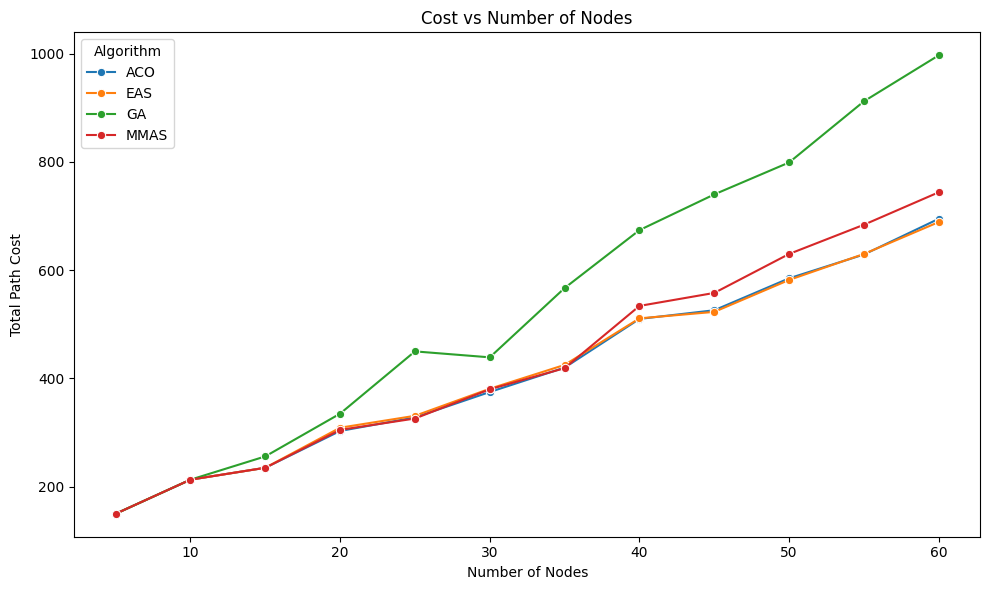

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary, x='num_nodes', y='cost', hue='algorithm', marker='o')
plt.title('Cost vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Total Path Cost')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

### Plotting Time versus number of nodes

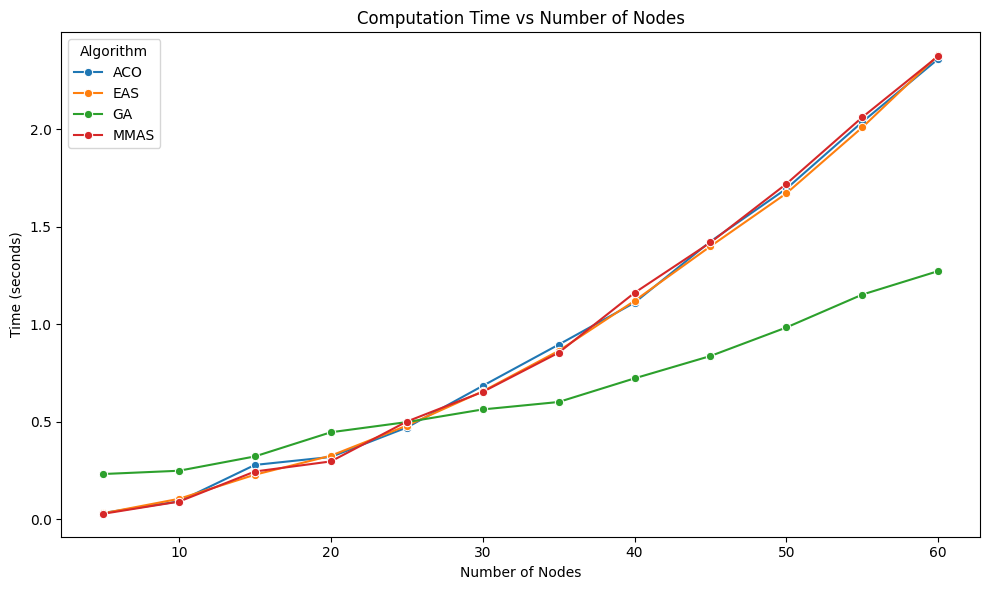

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary, x='num_nodes', y='time_sec', hue='algorithm', marker='o')
plt.title('Computation Time vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Time (seconds)')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

### Combined Metrics (Both time and cost)

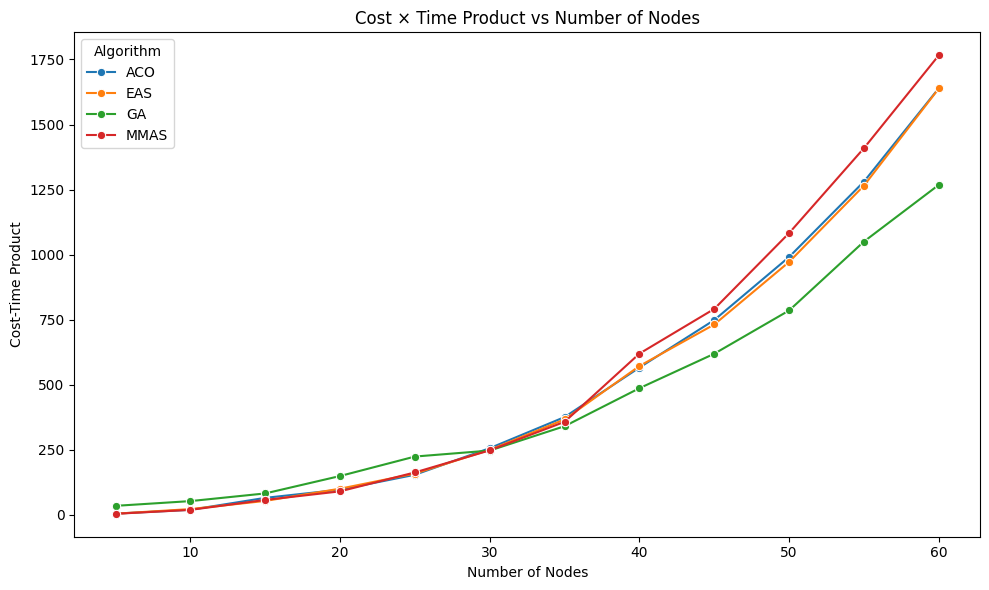

In [8]:
summary['cost_time_product'] = summary['cost'] * summary['time_sec']

plt.figure(figsize=(10, 6))
sns.lineplot(data=summary, x='num_nodes', y='cost_time_product', hue='algorithm', marker='o')
plt.title('Cost × Time Product vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Cost-Time Product')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

## 🔍 Round 1 Inference: Initial Benchmark Analysis

In the first round of benchmarking, we evaluated the performance of four metaheuristic algorithms—**Ant Colony Optimization (ACO)**, **Elitist Ant System (EAS)**, **Max-Min Ant System (MMAS)**, and the **Genetic Algorithm (GA)**—on synthetically generated TSP instances with increasing graph sizes (5–60 nodes). All algorithms were run using the **same parameters** across all tests to maintain consistency in comparison:

> **🛠 Parameter Configuration (for Round 1):**

> ACO_PARAMS = {
    "num_ants": 20,
    "num_iterations": 100,
    "alpha": 1.0,
    "beta": 5.0,
    "evaporation_rate": 0.5,
    "pheromone_constant": 100.0,
    "elitist_factor": 1
}

> EAS_PARAMS = {**ACO_PARAMS, "elitist_factor": 5}

> MMAS_PARAMS = {**ACO_PARAMS, "pheromone_min": 0.1, "pheromone_max": 10.0}

> GA_PARAMS = {
    "population_size": 100,
    "num_generations": 200,
    "mutation_rate": 0.1,
    "elitism_rate": 0.1
}

---

### 🧠 Key Observations

1. **Genetic Algorithm (GA):**

   * GA consistently produced **higher-cost solutions** across all node sizes compared to the ant colony-based algorithms.
   * However, it also exhibited the **lowest inference time**, especially noticeable at higher node counts (e.g., \~1.25s at 60 nodes vs. >2.6s for others).
   * This raises two possibilities:

     * **GA may naturally underperform** on adjacency matrices in comparison to ACO variants, especially without domain-specific enhancements.
     * Or, more likely, the **parameters used for GA were not optimized** or comparable in computational effort to those used for the ant colony algorithms. A low population size, insufficient generations, or poorly tuned crossover/mutation rates could explain the subpar solutions despite the faster runtime.

2. **MMAS Performance Degradation Beyond 35 Nodes:**

   * MMAS performed comparably to ACO and EAS up to around 35 nodes, after which its results began to deviate with slightly higher costs.
   * This can be attributed to MMAS's **strong exploitation bias**—it restricts pheromone values between fixed min and max bounds, making it more prone to **premature convergence** if the search space isn't explored thoroughly.
   * Given the same number of ants as other variants, MMAS may have lacked sufficient exploration capacity to maintain competitive solution quality at higher node sizes.

---

## 🔄 Proposed Next Steps

To further validate and refine our results, we propose the following experimental rounds:

---

### 🚀 **Round 2: Parameter Alignment for GA**

* Tune the GA's parameters to be **computationally comparable** to the ant colony variants.
* This may include increasing the population size, number of generations, and refining crossover/mutation logic.
* The goal is to assess whether GA's underperformance was due to poor configuration or fundamental limitations in solving TSP with adjacency matrices.
* **Metrics to evaluate:** path cost, inference time, stability across multiple runs.

---

### 🧪 **Round 3: Testing the Theoretical Superiority of MMAS**

* Increase the computational resources allocated to each algorithm by **doubling key parameters** (e.g., number of ants, number of iterations).
* This will hopefully allow MMAS to fully leverage its deeper search capabilities and exploitative nature.
* The aim is to explore whether MMAS, when adequately configured, can **outperform ACO and EAS** in solution quality, justifying its additional computational cost.
* Also, we shall see if doubling the parameters actually brings the calculated costs down and if the extra processing time taken would be justified.

---


## Round 2: Updated Parameters for GA

> New Parameters

> ACO_PARAMS = {
    "num_ants": 50,
    "num_iterations": 200,
    "alpha": 1.0,
    "beta": 5.0,
    "evaporation_rate": 0.5,
    "pheromone_constant": 100.0,
    "elitist_factor": 1
}

> EAS_PARAMS = {**ACO_PARAMS, "elitist_factor": 5}

> MMAS_PARAMS = {**ACO_PARAMS, "pheromone_min": 0.1, "pheromone_max": 10.0}

> GA_PARAMS = {
    "population_size": 200,
    "num_generations": 500,
    "mutation_rate": 0.1,
    "elitism_rate": 0.3
}

In [9]:
df2= pd.read_csv('benchmark_results_02.csv')

In [10]:
df2.head()

,algorithm,filename,num_nodes,cost,time_sec,path
0,ACO,tsp_data_10.json,10,213,0.0897,"[0, 4, 1, 9, 3, 6, 2, 7, 8, 5, 0]"
1,EAS,tsp_data_10.json,10,213,0.0895,"[0, 4, 1, 9, 3, 6, 2, 7, 8, 5, 0]"
2,MMAS,tsp_data_10.json,10,213,0.0981,"[0, 4, 1, 9, 3, 6, 2, 7, 8, 5, 0]"
3,GA,tsp_data_10.json,10,224,1.0611,"[0, 3, 6, 9, 4, 1, 2, 7, 8, 5, 0]"
4,ACO,tsp_data_15.json,15,235,0.1782,"[0, 3, 5, 11, 2, 6, 1, 14, 12, 4, 8, 7, 13, 10..."


In [11]:
# Group and summarise:
summary2= df2.groupby(['algorithm', 'num_nodes'])[['cost', 'time_sec']].mean().reset_index()
summary2.head()

,algorithm,num_nodes,cost,time_sec
0,ACO,5,150.0,0.0604
1,ACO,10,213.0,0.0897
2,ACO,15,235.0,0.1782
3,ACO,20,309.0,0.3233
4,ACO,25,328.0,0.4801


### Round 2: Plotting Cost versus number of nodes

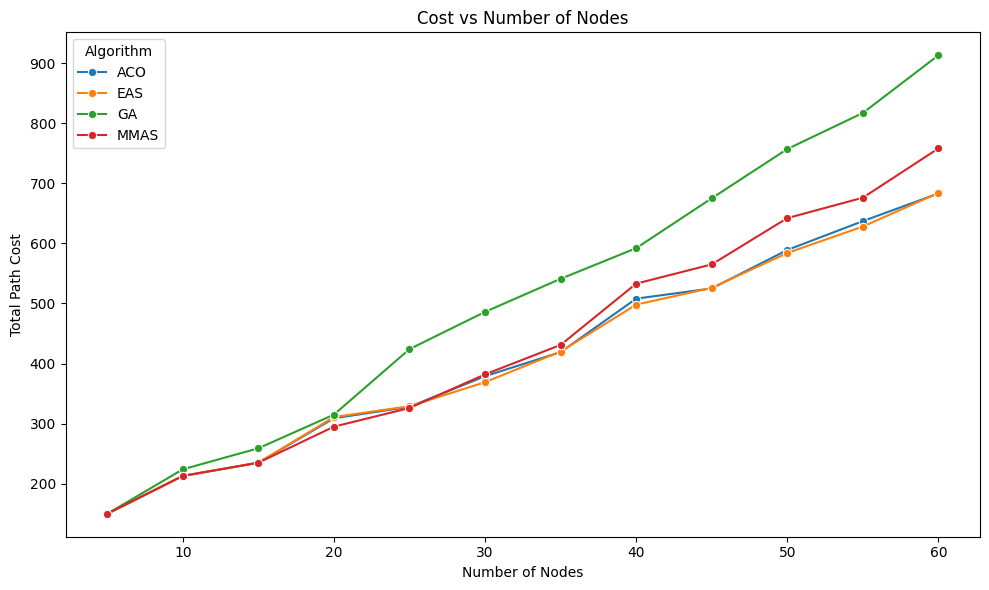

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary2, x='num_nodes', y='cost', hue='algorithm', marker='o')
plt.title('Cost vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Total Path Cost')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

### Plotting Time versus number of nodes

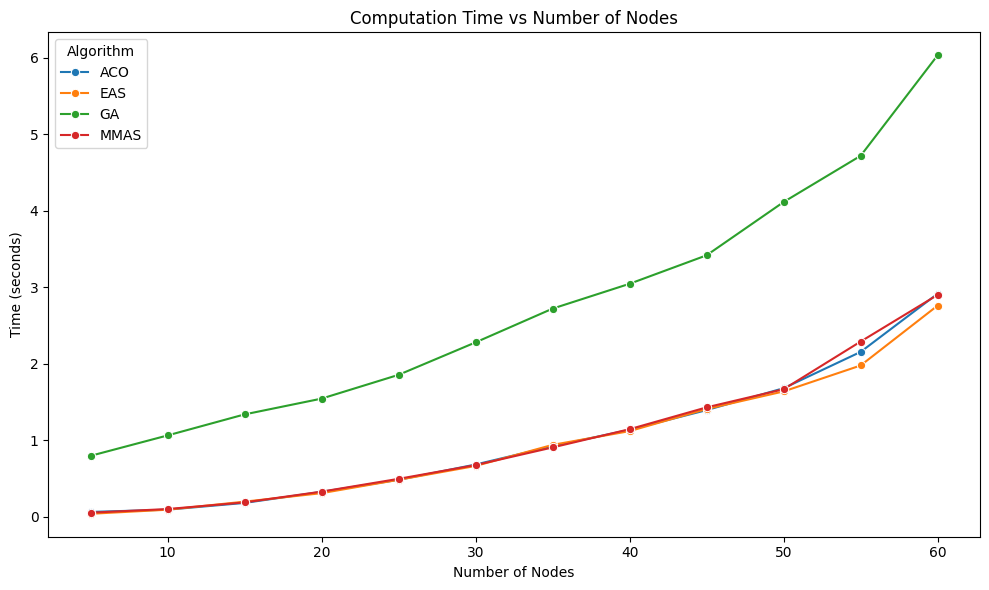

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary2, x='num_nodes', y='time_sec', hue='algorithm', marker='o')
plt.title('Computation Time vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Time (seconds)')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

### Combined Metrics:

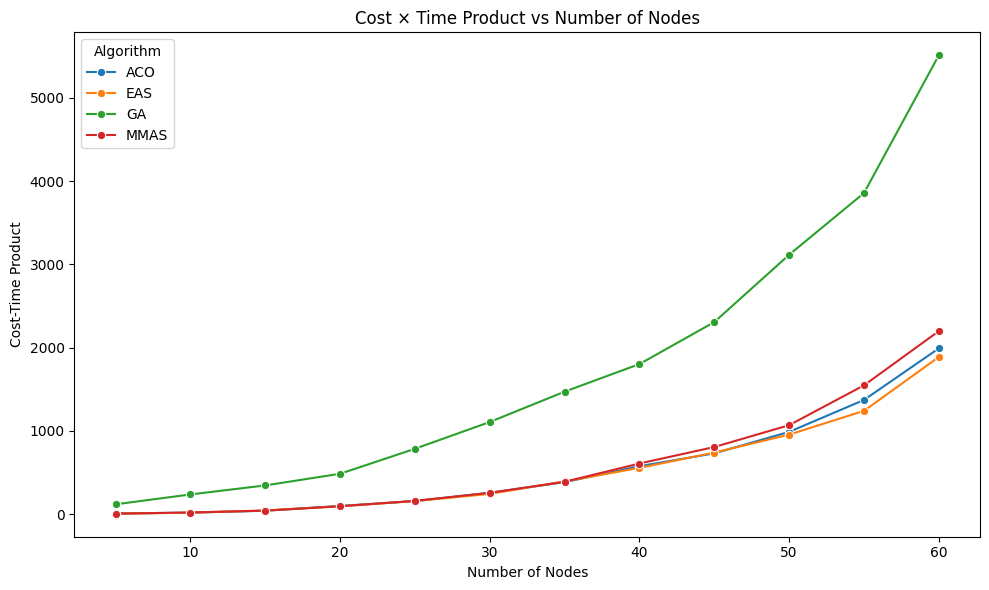

In [14]:
summary2['cost_time_product'] = summary2['cost'] * summary2['time_sec']

plt.figure(figsize=(10, 6))
sns.lineplot(data=summary2, x='num_nodes', y='cost_time_product', hue='algorithm', marker='o')
plt.title('Cost × Time Product vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Cost-Time Product')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

Thanks for sharing the Round 2 summary—it captures the key developments well. Here's a refined version of your write-up to match the tone, structure, and clarity of your Round 1 analysis, with improved flow, technical phrasing, and consistency:

---

## 🔍 Round 2 Inference: GA Parameter Optimization

In the second round of benchmarking, we revisited the performance evaluation of the same four metaheuristic algorithms—**Ant Colony Optimization (ACO)**, **Elitist Ant System (EAS)**, **Max-Min Ant System (MMAS)**, and the **Genetic Algorithm (GA)**—on synthetically generated TSP instances ranging from 5 to 60 nodes. The primary change in this round was the **reconfiguration of GA parameters**, motivated by its underperformance in Round 1.

> **📉 Previous GA Configuration:**

> GA_PARAMS = {
>     "population_size": 100,
>     "num_generations": 200,
>     "mutation_rate": 0.1,
>     "elitism_rate": 0.1
> }

> **📈 Updated GA Configuration (Round 2):**

> GA_PARAMS = {
>     "population_size": 200,
>     "num_generations": 500,
>     "mutation_rate": 0.1,
>     "elitism_rate": 0.3
> }

---

### 🧠 Key Observations

1. **Improved Solution Quality with GA Tuning:**

   * The revised GA configuration led to **noticeable improvements in solution quality** across all node sizes.
   * However, despite this progress, GA still **lags behind the ant colony-based algorithms** in terms of final path cost, particularly at larger graph sizes.

2. **Significant Increase in Inference Time:**

   * The enhanced GA now exhibits **substantially longer inference times**, especially in the second half of the test range (beyond 30 nodes).
   * While GA was previously the fastest algorithm, it now takes **more than twice the time** of the ACO variants for graphs with 40+ nodes.
   * The runtime curve shows a **steep upward trend**, suggesting that GA's computational cost will scale unfavorably as graph size increases further.

3. **Contextual Insight:**

   * These findings reinforce the hypothesis that, **for adjacency matrix representations of TSP**, **ant colony-based algorithms are more time-efficient** in delivering high-quality solutions.
   * Even with improved parameters, **GA’s time-to-quality trade-off is less favorable**, potentially making it unsuitable for larger problem instances without further architectural or heuristic refinements.

---

## 🔄 Proposed Next Steps

With GA optimization complete, we now turn our focus to the **ant colony variants**:

---

### 🚀 **Round 3: Scaling Up ACO Variants**

* Increase key parameters (e.g., number of ants, iterations) across ACO, EAS, and MMAS to assess their performance under **extended computation budgets**.
* Specifically, we aim to:

  * Determine whether **additional processing time yields proportionally better solutions**.
  * Re-evaluate **MMAS**, which began underperforming beyond 35 nodes, to see if increased exploration depth helps overcome its early convergence issue.
* This round will help quantify the **efficiency trade-offs** in investing more compute for higher solution accuracy.

---

Let me know if you'd like me to help draft visual plots, parameter tuning tables, or a performance comparison summary next.


## Round 3: Better Params for Ant colony

In [15]:
df3= pd.read_csv("benchmark_results_03.csv")

In [16]:
df3.head()

,algorithm,filename,num_nodes,cost,time_sec,path
0,ACO,tsp_data_10.json,10,213,0.4853,"[0, 4, 1, 9, 3, 6, 2, 7, 8, 5, 0]"
1,EAS,tsp_data_10.json,10,213,0.5702,"[0, 4, 1, 9, 3, 6, 2, 7, 8, 5, 0]"
2,MMAS,tsp_data_10.json,10,213,0.4384,"[0, 4, 1, 9, 3, 6, 2, 7, 8, 5, 0]"
3,GA,tsp_data_10.json,10,213,1.0988,"[0, 4, 1, 9, 3, 6, 2, 7, 8, 5, 0]"
4,ACO,tsp_data_15.json,15,235,0.9886,"[0, 3, 5, 11, 2, 6, 1, 14, 12, 4, 8, 7, 13, 10..."


In [17]:
# Group and summarise:
summary3= df3.groupby(['algorithm', 'num_nodes'])[['cost', 'time_sec']].mean().reset_index()
summary3.head()

,algorithm,num_nodes,cost,time_sec
0,ACO,5,150.0,0.1664
1,ACO,10,213.0,0.4853
2,ACO,15,235.0,0.9886
3,ACO,20,307.0,1.6347
4,ACO,25,328.0,2.3381


### Round 3: Plotting Cost versus number of nodes

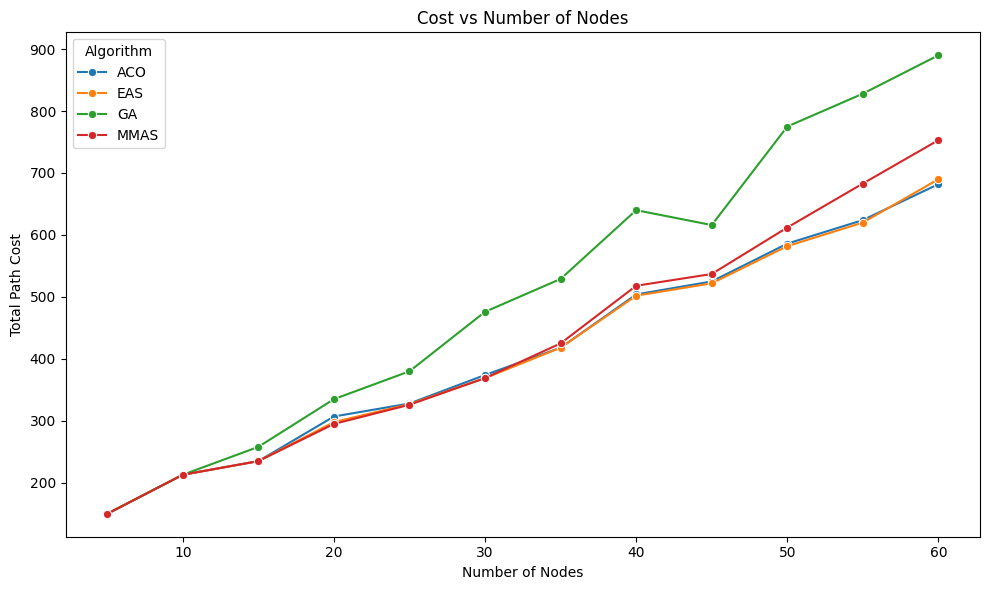

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary3, x='num_nodes', y='cost', hue='algorithm', marker='o')
plt.title('Cost vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Total Path Cost')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

### Plotting Time versus number of nodes:

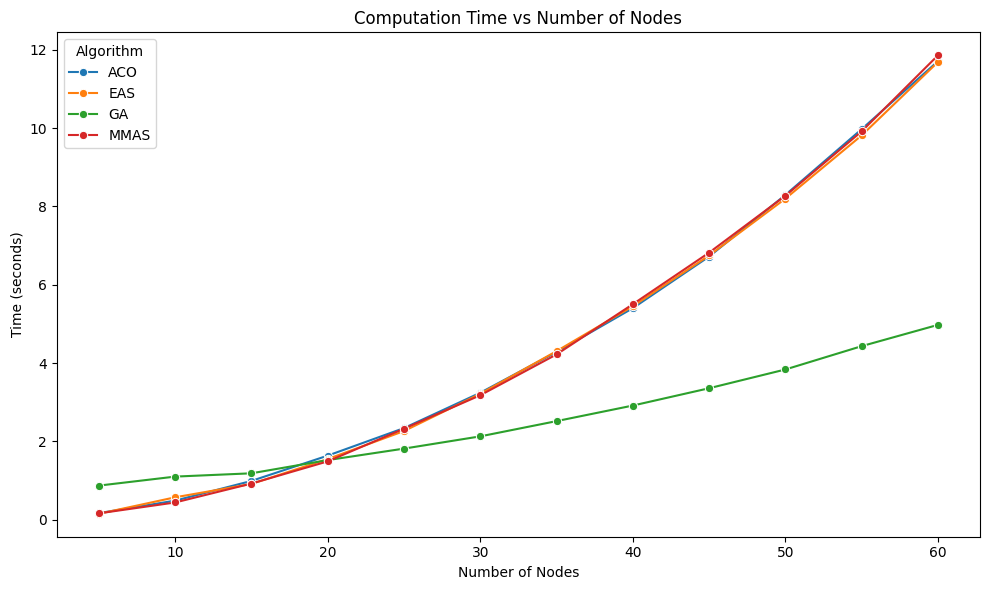

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary3, x='num_nodes', y='time_sec', hue='algorithm', marker='o')
plt.title('Computation Time vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Time (seconds)')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

### Combined Metrics

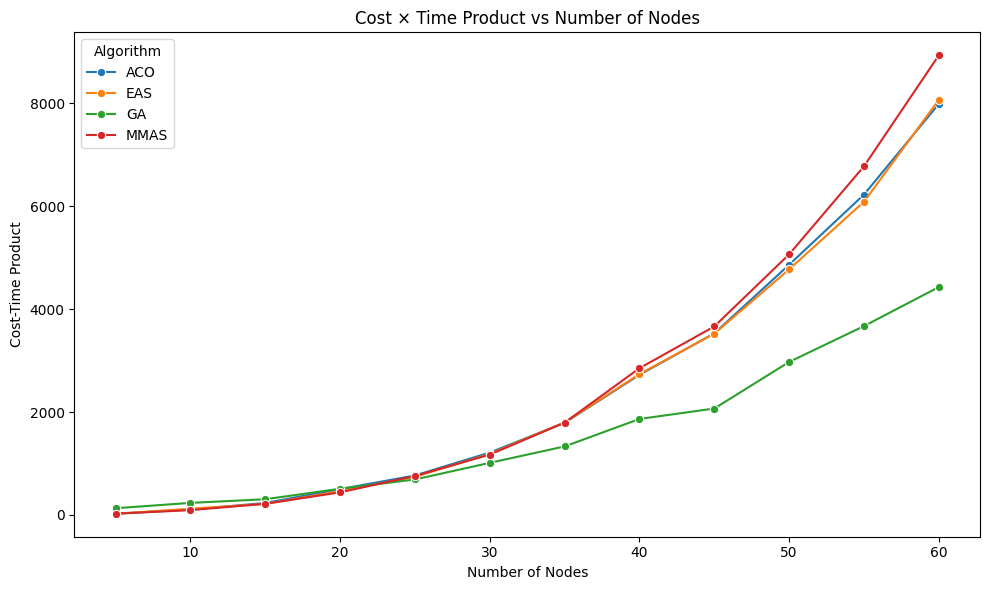

In [20]:
summary3['cost_time_product'] = summary3['cost'] * summary3['time_sec']

plt.figure(figsize=(10, 6))
sns.lineplot(data=summary3, x='num_nodes', y='cost_time_product', hue='algorithm', marker='o')
plt.title('Cost × Time Product vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Cost-Time Product')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

## Comparative Analysis: Before and After Parameter update for ACO variants:

In [21]:
# Combine summary1 and summary 2

summary2["version"] = "Before Update"
summary3["version"] = "After Update"

combined_summary = pd.concat([summary2, summary3])

### ✅ Plot 1 — Combined Cost Comparison Across All ACO Variants

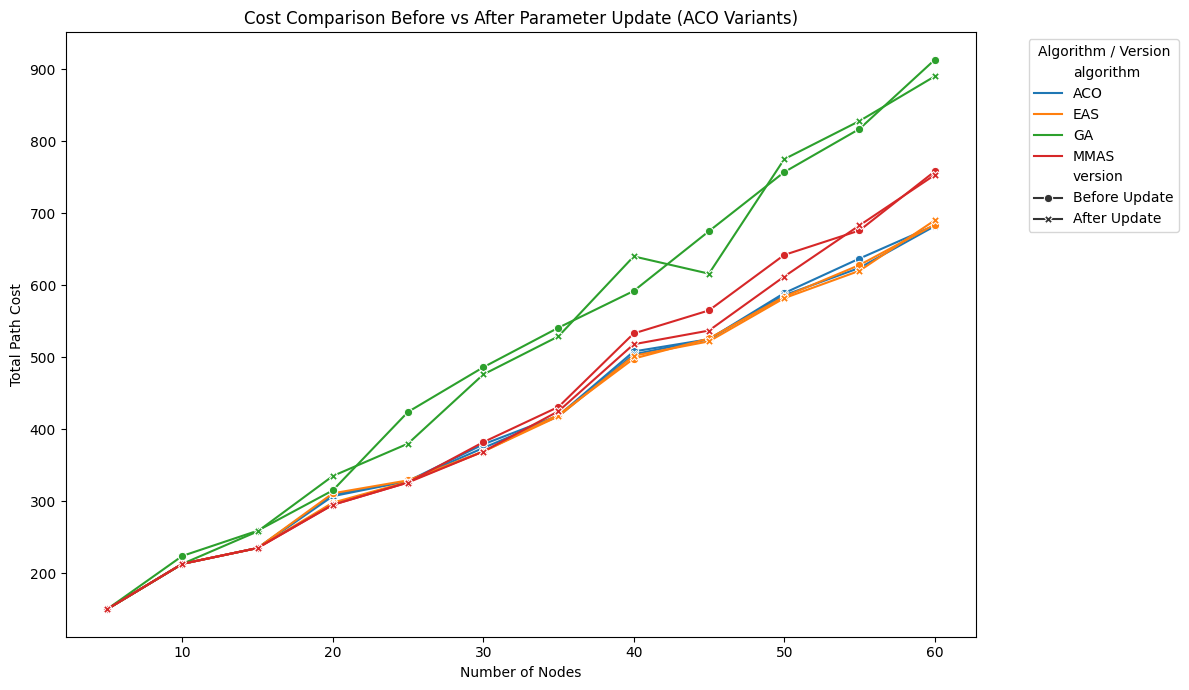

In [22]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=combined_summary, x='num_nodes', y='cost', hue='algorithm', style='version', markers=True, dashes=False)
plt.title('Cost Comparison Before vs After Parameter Update (ACO Variants)')
plt.xlabel('Number of Nodes')
plt.ylabel('Total Path Cost')
plt.legend(title='Algorithm / Version', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [23]:
# Observation: Almost no change can be observed in macro level. Let us check it out individually

### ✅ Plot 2 — Individual Cost Comparison Per Algorithm

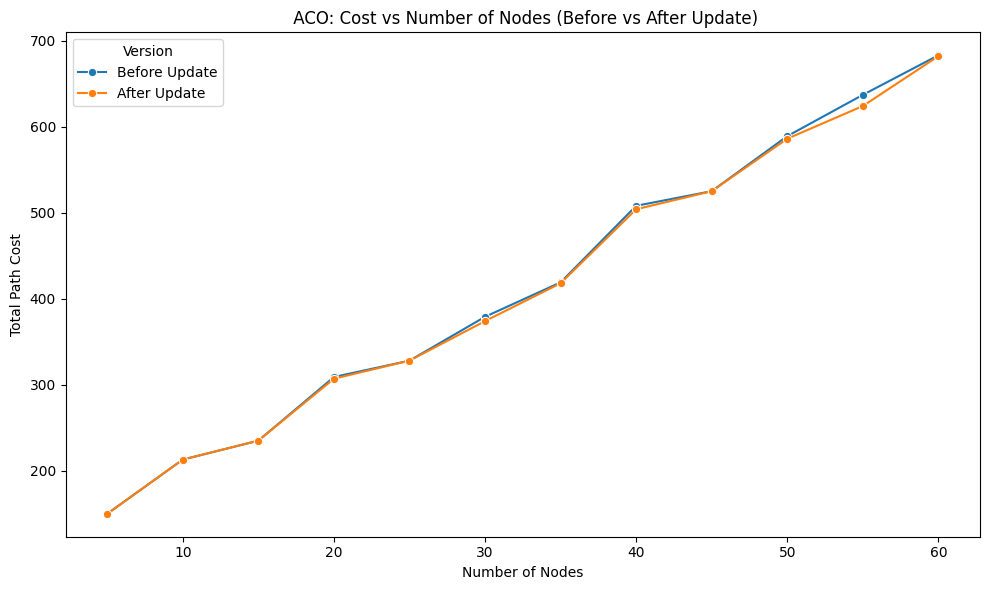

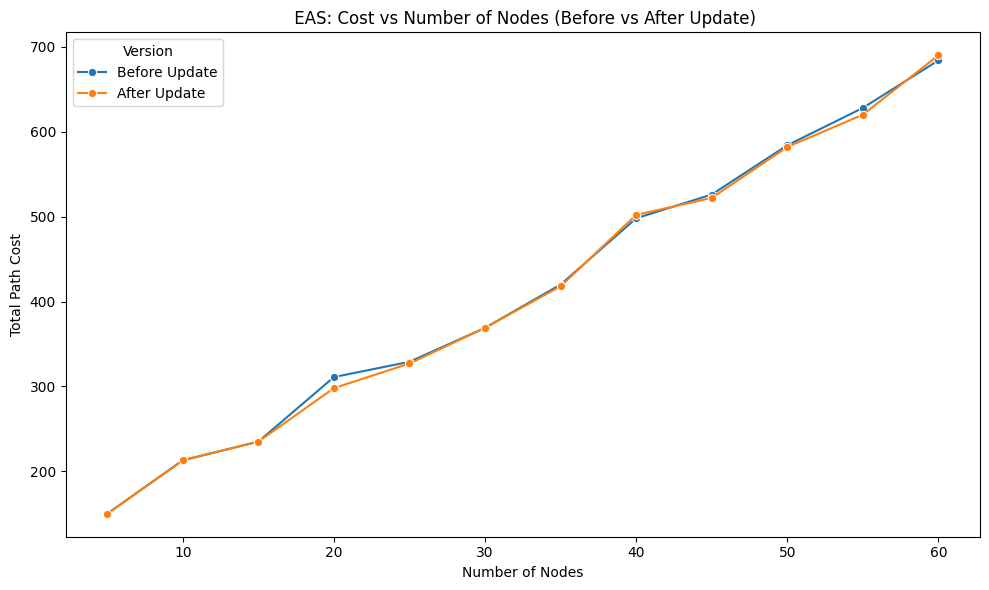

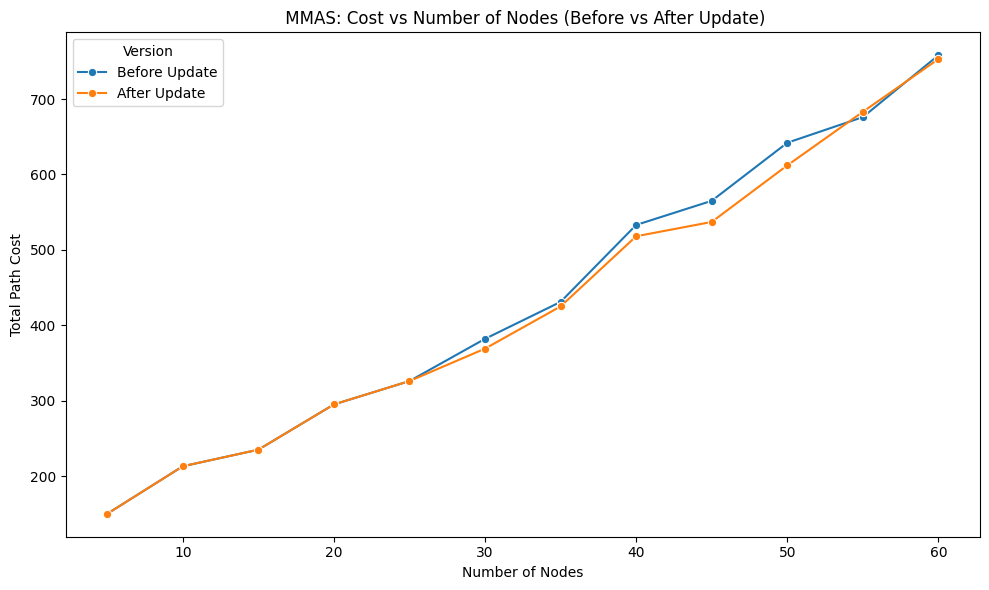

In [26]:
for algo in ['ACO', 'EAS', 'MMAS']:
    plt.figure(figsize=(10, 6))
    data = combined_summary[combined_summary['algorithm'] == algo]
    sns.lineplot(data=data, x='num_nodes', y='cost', hue='version', marker='o')
    plt.title(f' {algo}: Cost vs Number of Nodes (Before vs After Update)')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Total Path Cost')
    plt.legend(title='Version')
    plt.tight_layout()
    plt.show()

In [25]:
'''
Observation: For the ACO variants, apart from MMAS, only very minute changes are observed. But, if the time taken isn't significantly higher, then 
it could be worth it.
'''

"\nObservation: For the ACO variants, apart from MMAS, only very minute changes are observed. But, if the time taken isn't significantly higher, then \nit could be worth it.\n"

### Combined Time plot

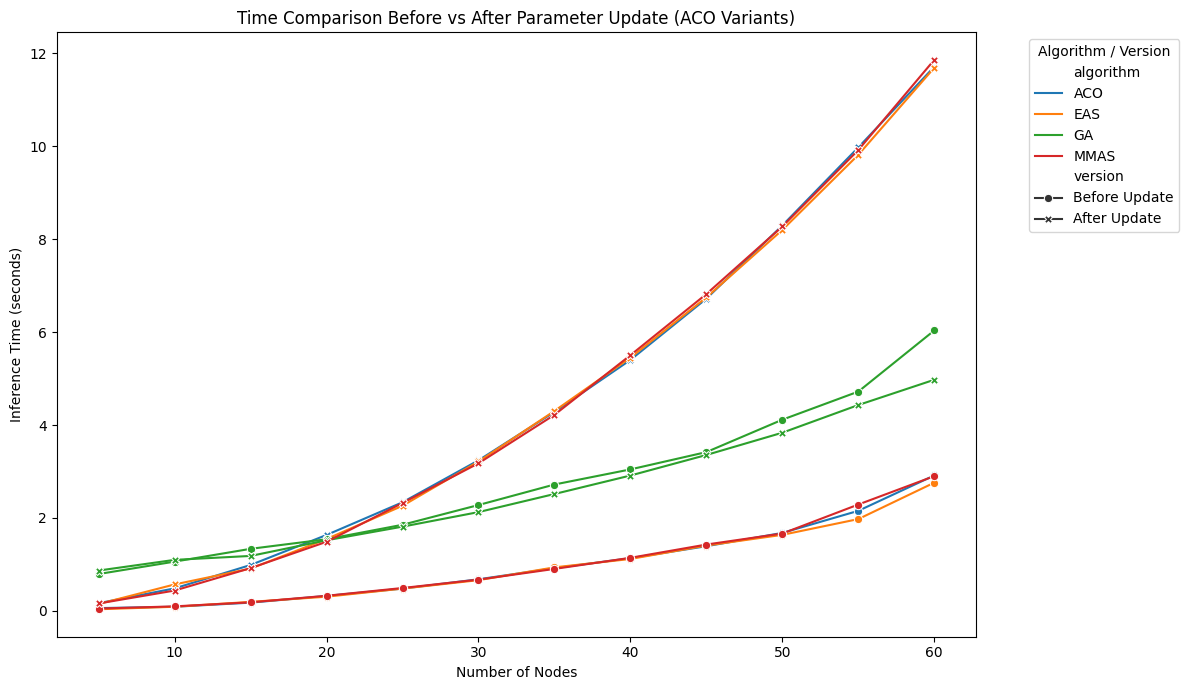

In [29]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=combined_summary, x='num_nodes', y='time_sec', hue='algorithm', style='version', markers=True, dashes=False)
plt.title('Time Comparison Before vs After Parameter Update (ACO Variants)')
plt.xlabel('Number of Nodes')
plt.ylabel('Inference Time (seconds)')
plt.legend(title='Algorithm / Version', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
# Inference: There is indeed a significant change in time between the ACO variants before and after the parameter update. But, the returns aren't as high as the time

### Individual Time plot per algorithm

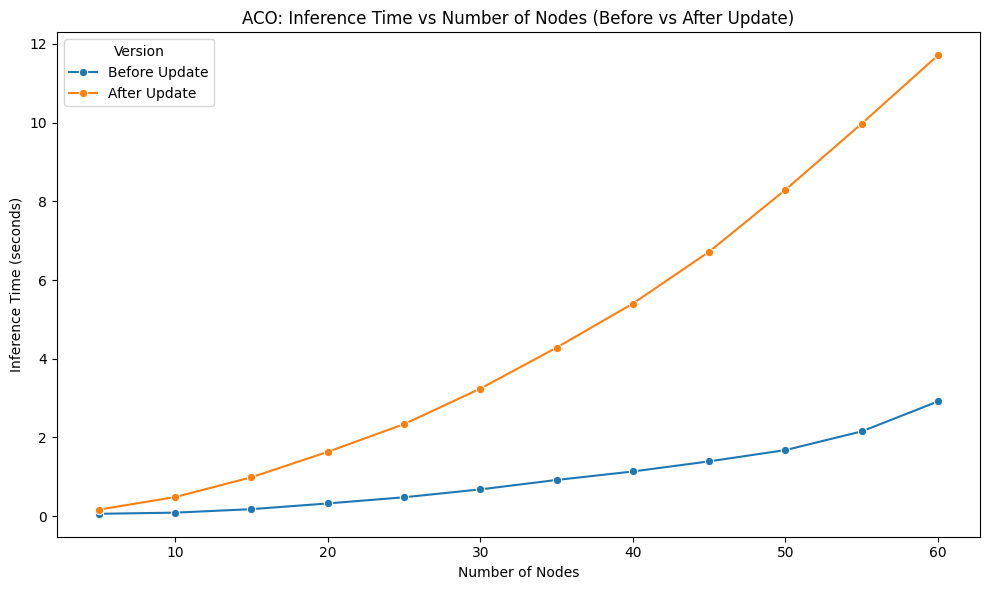

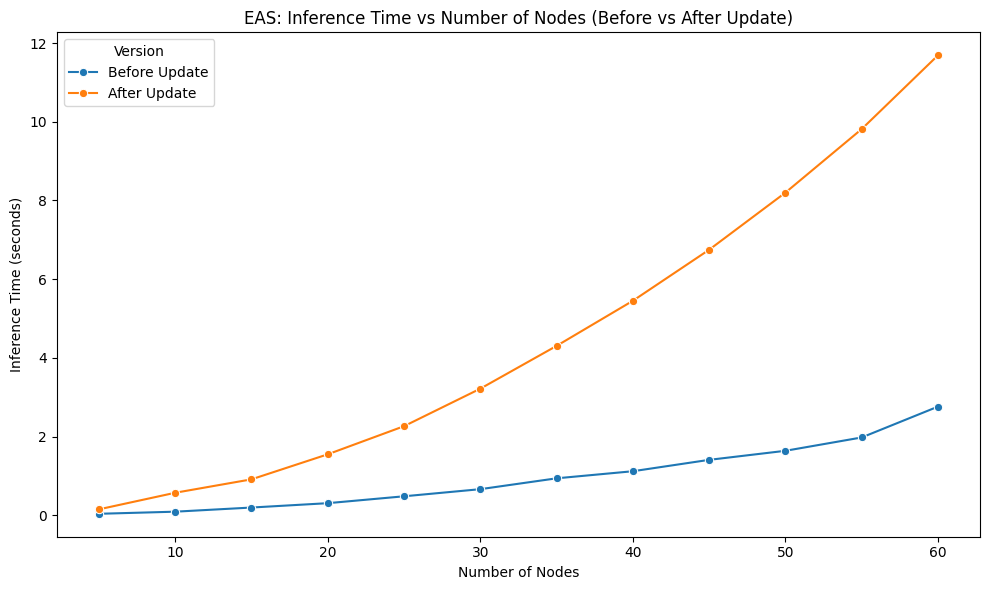

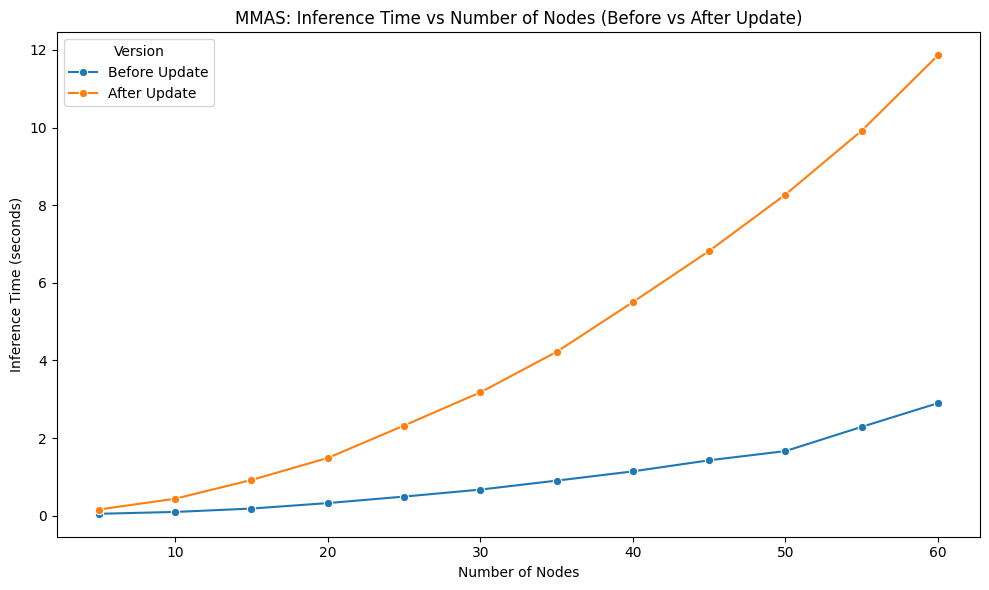

In [30]:
for algo in ['ACO', 'EAS', 'MMAS']:
    plt.figure(figsize=(10, 6))
    data = combined_summary[combined_summary['algorithm'] == algo]
    sns.lineplot(data=data, x='num_nodes', y='time_sec', hue='version', marker='o')
    plt.title(f'{algo}: Inference Time vs Number of Nodes (Before vs After Update)')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Inference Time (seconds)')
    plt.legend(title='Version')
    plt.tight_layout()
    plt.show()

In [31]:
'''
The jump is indeed significant, yet the cost estimates aren't as good, Because the cost is already very close to the minimum with lower parameters.
Hence, we won't find any remarkable changes between the algorithms before and after increasing the params, yet the time curve grows strongly upwards 
with node count in increased parameter version, while the time change is almost linear in previous version.
'''

"\nThe jump is indeed significant, yet the cost estimates aren't as good, Because the cost is already very close to the minimum with lower parameters.\nHence, we won't find any remarkable changes between the algorithms before and after increasing the params, yet the time curve grows strongly upwards \nwith node count in increased parameter version, while the time change is almost linear in previous version.\n"

### FInal Plot: Combined Cost-Time Product Plot for All ACO Variants

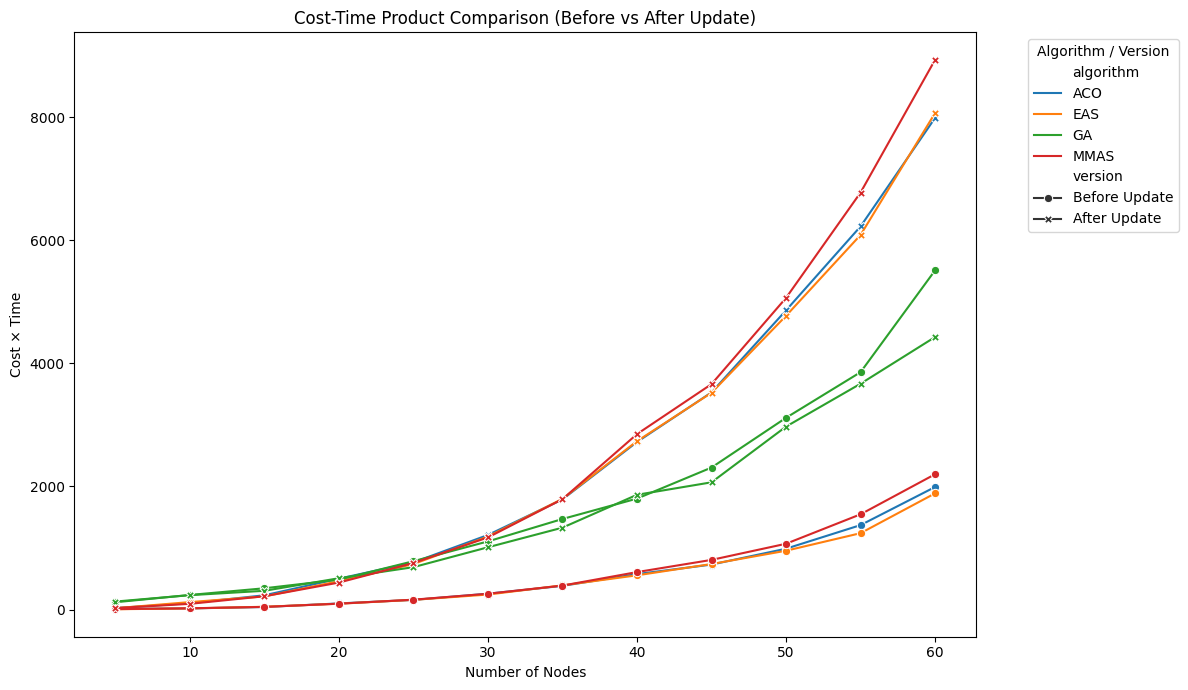

In [32]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=combined_summary, x='num_nodes', y='cost_time_product', hue='algorithm', style='version', markers=True, dashes=False)
plt.title('Cost-Time Product Comparison (Before vs After Update)')
plt.xlabel('Number of Nodes')
plt.ylabel('Cost × Time')
plt.legend(title='Algorithm / Version', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 🧾 Final Conclusion: Optimal Strategy for TSP in Logistics Pathfinding

Across three rounds of controlled benchmarking on synthetically generated TSP instances, we evaluated the performance of four metaheuristic algorithms—**ACO**, **Elitist Ant System (EAS)**, **Max-Min Ant System (MMAS)**, and **Genetic Algorithm (GA)**—with a focus on both **solution quality** and **inference time**.

### 📌 Key Insights:

* **Parameter Scaling Yields Diminishing Returns**:
  While increasing the parameters (ants, iterations) led to miniscule improvements in path cost, the **runtime cost increased disproportionately**, shifting from a near-linear to a near-quadratic time curve. This trade-off was not justified for the typical node range we’re targeting.

* **Sweet Spot Already Achieved with Initial Parameters**:
  For graph sizes relevant to our logistics domain (typically **40–80 nodes**, the upper range found by my initial research on logistics), the **original parameter configuration** achieved **near-optimal solutions at significantly lower compute cost**. No additional gain was observed that would justify the extra processing from scaling up parameters.

* **Elitist Ant System Slightly Edges Ahead**:
  Among the ant colony variants, **EAS consistently produced marginally better results**, especially in a few critical cases, without sacrificing time. Though close to standard ACO, this slight advantage in path cost makes EAS a favorable choice.

* **Genetic Algorithm Falls Short in This Context**:
  Despite parameter tuning, **GA failed to match ACO variants** in solution quality, and its runtime scaled poorly after tuning. For adjacency matrix-based TSP, **ant colony algorithms are the more efficient choice**.

* **MMAS Remains Inconsistent Without Dynamic Tuning**:
  MMAS showed potential but was more **sensitive to parameter constraints**, likely requiring **adaptive strategies** or **problem-specific fine-tuning**, which introduces additional complexity and overhead.

---

### 🧭 Recommendation

For practical TSP use cases in **logistics pathfinding**, where problem sizes typically range between **40 to 120 nodes**, the **Elitist Ant System (EAS)** with the original, lightweight parameter set strikes the best balance between **solution quality and runtime efficiency**. It is robust, scalable within the operational range, and does not require elaborate tuning.

Future research could explore **dynamic or hybrid heuristics** for larger, more complex graph structures, but for our targeted domain, **EAS stands out as the most viable and cost-effective solution** with following parameters that we will be using:

>  "num_ants": 20, "num_iterations": 100, "alpha": 1.0, "beta": 5.0, "evaporation_rate": 0.5, "pheromone_constant": 100.0, "elitist_factor": 5

---
